In [1]:
import numpy as np

import matplotlib.pyplot as plt
import random
import scipy as sc
from scipy.io import wavfile

In [2]:
#定义向量的内积

def multiVector(A,B):
    
    C=sc.zeros(len(A))
    
    for i in range(len(A)):
        
        C[i]=A[i]*B[i]
        
    return sum(C)


In [3]:
#取定给定的反向的个数

def inVector(A,b,a):
    
    D=sc.zeros(b-a+1)
    
    for i in range(b-a+1):
        
        D[i]=A[i+a]
    
    return D[::-1]

In [4]:
#lMS算法的函数

def LMS(xn,dn,M,mu,itr):
    
    en=sc.zeros(itr)
    
    W=[[0]*M for i in range(itr)]
    
    
    for k in range(itr)[M-1:itr]:
        
        x=inVector(xn,k,k-M+1)
        d= x.mean()
        
        y=multiVector(W[k-1],x)
        
        en[k]=d -y
        
        W[k]=np.add(W[k-1],2*mu*en[k]*x) #更新权重
    
    #求最优时滤波器的输出序列
    
    yn=sc.inf*sc.ones(len(xn))
    
    for k in range(len(xn))[M-1:len(xn)]:
    
        x=inVector(xn,k,k-M+1)
        
        yn[k]=multiVector(W[len(W)-1],x)
    
    return (yn,en)



C:\Users\POTATO~1\AppData\Local\Temp/ipykernel_4648/4249222092.py:5: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  en=sc.zeros(itr)
C:\Users\POTATO~1\AppData\Local\Temp/ipykernel_4648/2024728050.py:9: RuntimeWarning: overflow encountered in double_scalars
  C[i]=A[i]*B[i]
C:\Users\POTATO~1\AppData\Local\Temp/ipykernel_4648/4249222092.py:19: RuntimeWarning: invalid value encountered in add
  W[k]=np.add(W[k-1],2*mu*en[k]*x) #更新权重
C:\Users\POTATO~1\AppData\Local\Temp/ipykernel_4648/4249222092.py:23: DeprecationWarning: scipy.ones is deprecated and will be removed in SciPy 2.0.0, use numpy.ones instead
  yn=sc.inf*sc.ones(len(xn))


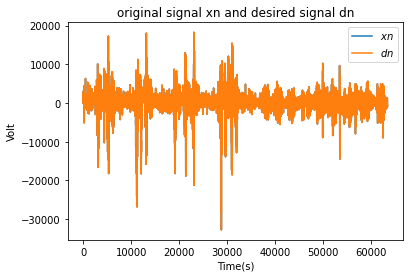

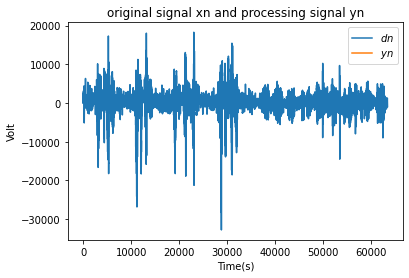

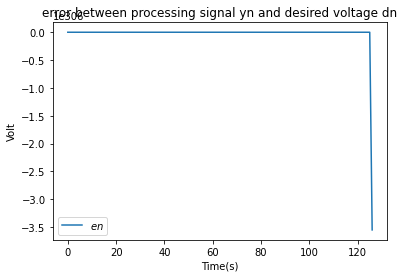

In [5]:
if __name__=="__main__":
  
    fs, x = wavfile.read("104_1b1_Al_sc_Litt3200.wav")
    
    #参数初始化
    
    # itr=10000 #采样的点数
    itr=len(x)
    mu =0
    sigma =0.12
    noise_size  = itr
    
    # X = np.linspace(0,4*np.pi,itr,endpoint=True)
    # Y = np.sin(X)
    Y = x
    signal_array = Y#[0.0]*noise_size
    noise_array =  np.random.normal(0, 0.3, noise_size)
    """noise_array = []
    for x in range(itr):
        noise_array.append(random.gauss(mu,sigma))"""
    # signal_noise_array = signal_array+noise_array  
    signal_noise_array = signal_array
    
    M=64 #滤波器的阶数
    
    mu=0.0001 #步长因子
    
    xs=signal_noise_array
    
    xn=xs #原始输入端的信号为被噪声污染的正弦信号
    
    dn=signal_array #对于自适应对消器，用dn作为期望
    
    #调用LMS算法
    
    (yn,en)=LMS(xn,dn,M,mu,itr)
    
    #画出图形
    
    plt.figure(1)
    
    plt.plot(xn,label="$xn$")
    
    plt.plot(dn,label="$dn$")
    
    plt.xlabel("Time(s)")
    
    plt.ylabel("Volt")
    
    plt.title("original signal xn and desired signal dn")
    
    plt.legend()
    
    plt.figure(2)
    #plt.plot(xn,label="$xn$")
    #plt.plot(xn,label="$xn$")
    plt.plot(dn,label="$dn$")
    plt.plot(yn,label="$yn$")
    
    plt.xlabel("Time(s)")
    
    plt.ylabel("Volt")
    
    plt.title("original signal xn and processing signal yn")
    
    plt.legend()
    
    plt.figure(3)
    
    plt.plot(en,label="$en$")
    
    plt.xlabel("Time(s)")
    
    plt.ylabel("Volt")
    
    plt.title("error between processing signal yn and desired voltage dn")
    
    plt.legend()
    
    plt.show()
    

